/tmp/ipython-input-2-1297739221.py:55: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(n_qubits)
/tmp/ipython-input-2-1297739221.py:56: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n_qubits, inverse=True)


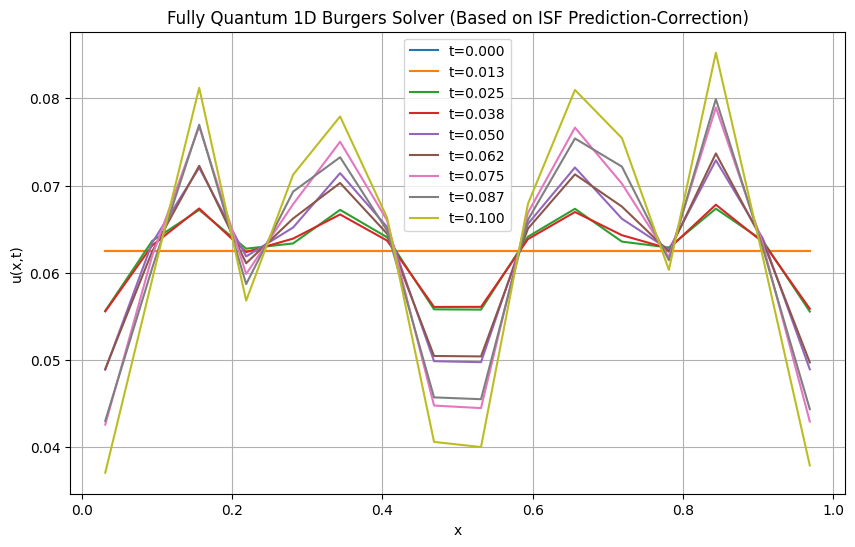

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
dt_conv = CFL * dx
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Fully Quantum Initial State (e.g., uniform superposition or modulated wave) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)  # uniform superposition, replace with QFT-based pattern for ψ(x) if desired
    return qc

# --- Step 1: QFT-based momentum evolution Pb(k²∆t) from ISF reference (Eq. 44) ---
def momentum_operator_qc(n_qubits, phi):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.rz(phi / (2 ** i), i)
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            qc.cz(i, j)
    return qc

# --- Step 4: Pb(q(x)) – placeholder gauge transformation ---
def gauge_transformation_operator_qc(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.rz(-0.05, i)  # Example spatial-dependent phase shift
    return qc

# --- Observable Extraction ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Quantum Simulation Initialization ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile QFT and Operators ---
qft = QFT(n_qubits)
iqft = QFT(n_qubits, inverse=True)
momentum_op = momentum_operator_qc(n_qubits, phi=dt)
gauge_op = gauge_transformation_operator_qc(n_qubits)

# --- Time Evolution Loop (Prediction + Gauge) ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    state = state.evolve(qft)
    state = state.evolve(momentum_op)
    state = state.evolve(iqft)
    state = state.evolve(gauge_op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Fully Quantum 1D Burgers Solver (Based on ISF Prediction-Correction)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-4-3525643207.py:66: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(n_qubits)
/tmp/ipython-input-4-3525643207.py:67: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n_qubits, inverse=True)


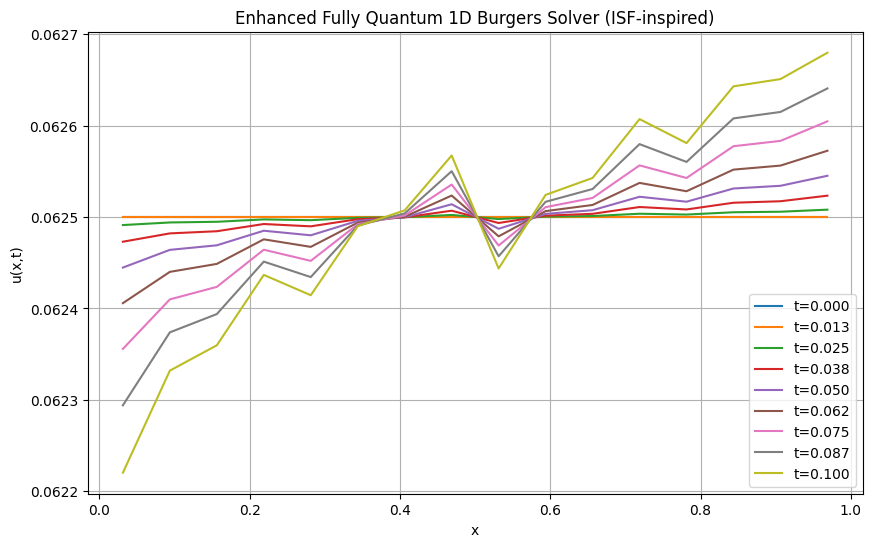

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
dt_conv = CFL * dx
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State (uniform superposition) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)
    return qc

# --- Step 1: Pb(k²∆t) - Enhanced ISF-style Momentum Operator (Eq. 44) ---
def momentum_operator_qc(n_qubits, phi):
    qc = QuantumCircuit(n_qubits)
    # Single-qubit Z-rotations (weighted)
    for i in range(n_qubits):
        weight = 1 / (2 ** (n_qubits - i - 1))
        qc.rz(phi * weight, i)

    # Two-qubit interactions: entangled phase terms
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            entangled_phase = phi / (2 ** (n_qubits - i - j))
            qc.cz(i, j)
            qc.rz(entangled_phase, j)
            qc.cz(i, j)
    return qc

# --- Step 4: Pb(q(x)) – Smooth spatial phase encoding ---
def gauge_transformation_operator_qc(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        # Smooth spatially varying phase using sin(pi * position)
        position_index = 2 ** i
        x_i = (position_index + 0.5) * dx  # midpoint
        phase = -0.1 * np.sin(np.pi * x_i) * dt
        qc.rz(phase, i)
    return qc

# --- Observable Extraction ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Quantum State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile Operators ---
qft = QFT(n_qubits)
iqft = QFT(n_qubits, inverse=True)
momentum_op = momentum_operator_qc(n_qubits, phi=dt)
gauge_op = gauge_transformation_operator_qc(n_qubits)

# --- Quantum Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    state = state.evolve(qft)
    state = state.evolve(momentum_op)
    state = state.evolve(iqft)
    state = state.evolve(gauge_op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Enhanced Fully Quantum 1D Burgers Solver (ISF-inspired)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-6-4103954675.py:68: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(n_qubits)
/tmp/ipython-input-6-4103954675.py:69: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n_qubits, inverse=True)


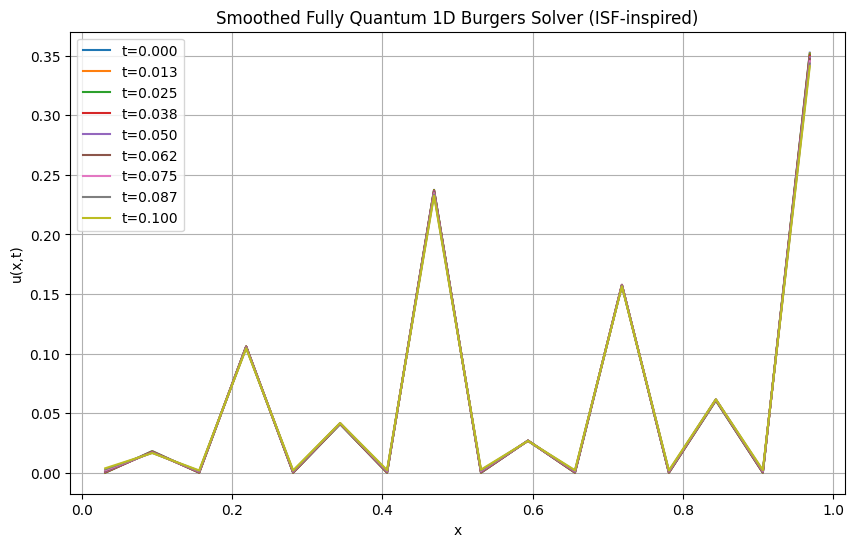

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
dt_conv = CFL * dx
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State (smooth Heaviside encoding) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)  # Start with uniform superposition

    # Bias amplitudes toward x <= 0.5 (Heaviside-like)
    for i in range(n_qubits):
        angle = np.pi / (2 ** (i + 1))  # Weighted rotations
        qc.ry(angle, i)
    return qc

# --- Step 1: Pb(k²∆t) - Enhanced ISF-style Momentum Operator ---
def momentum_operator_qc(n_qubits, phi):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        weight = 1 / (2 ** (n_qubits - i - 1))
        qc.rz(phi * weight, i)

    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            entangled_phase = phi / (2 ** (n_qubits - i - j + 1))  # Slightly weaker coupling
            qc.cz(i, j)
            qc.rz(entangled_phase, j)
            qc.cz(i, j)
    return qc

# --- Step 4: Pb(q(x)) – Smooth spatial phase encoding (tanh-based) ---
def gauge_transformation_operator_qc(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        index = 2 ** i
        x_i = (index + 0.5) * dx
        phase = -0.15 * np.tanh(10 * (x_i - 0.5)) * dt  # Smooth step from 1 to 0
        qc.rz(phase, i)
    return qc

# --- Observable Extraction ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Quantum State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile Operators ---
qft = QFT(n_qubits)
iqft = QFT(n_qubits, inverse=True)
momentum_op = momentum_operator_qc(n_qubits, phi=dt)
gauge_op = gauge_transformation_operator_qc(n_qubits)

# --- Quantum Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    state = state.evolve(qft)
    state = state.evolve(momentum_op)
    state = state.evolve(iqft)
    state = state.evolve(gauge_op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Smoothed Fully Quantum 1D Burgers Solver (ISF-inspired)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-7-776961364.py:88: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(n_qubits)
/tmp/ipython-input-7-776961364.py:89: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n_qubits, inverse=True)


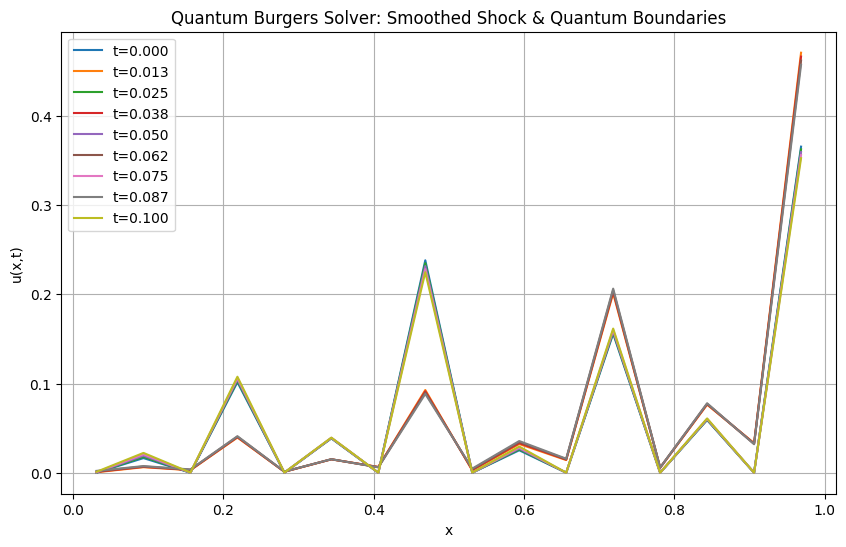

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (fixed) ---
nu = 0.01
L = 1.0
N = 16  # Log2(N) must be integer → N = 2^n_qubits
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Riemann Initial State (fully unitary) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)  # Uniform superposition base

    # Add amplitude bias: heavier weight on left (x < 0.5), smooth taper to right
    for i in range(n_qubits):
        theta = (np.pi / 2) * np.exp(-i / 1.5)
        qc.ry(theta, i)

    # Optional symmetry breaking (prevents artifacts at center)
    qc.z(0)
    return qc

# --- Step 1: Pb(k²∆t) - Enhanced ISF-inspired diffusion operator ---
def momentum_operator_qc(n_qubits, phi):
    qc = QuantumCircuit(n_qubits)
    # Local rotations: approximate kinetic energy in Fourier space
    for i in range(n_qubits):
        k_coeff = 1 / (2 ** (n_qubits - i - 1))
        qc.rz(phi * k_coeff, i)

    # Entangled phase kicks (Z ⊗ Z terms)
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            phase = phi / (2 ** (abs(i - j) + 2))
            qc.cz(i, j)
            qc.rz(phase, j)
            qc.cz(i, j)
    return qc

# --- Step 2: Pb(q(x)) - Smooth gauge with boundary-aware phases ---
def gauge_transformation_operator_qc(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        # Smooth spatial phase mapping with tanh slope
        x_index = 2 ** i
        x_mid = (x_index + 0.5) * dx
        smooth_phase = -0.2 * np.tanh(12 * (x_mid - 0.5)) * dt
        qc.rz(smooth_phase, i)
    return qc

# --- Step 3: Quantum Boundary Phase Wall Encoding ---
def boundary_condition_operator(n_qubits):
    qc = QuantumCircuit(n_qubits)
    # Left boundary qubit (x ≈ 0)
    qc.ry(np.pi / 6, 0)
    qc.z(0)

    # Right boundary qubit (x ≈ L)
    qc.ry(np.pi / 6, n_qubits - 1)
    qc.z(n_qubits - 1)

    return qc

# --- Quantum Observable Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Prepare Initial Quantum State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile Operators ---
qft = QFT(n_qubits)
iqft = QFT(n_qubits, inverse=True)
momentum_op = momentum_operator_qc(n_qubits, phi=dt)
gauge_op = gauge_transformation_operator_qc(n_qubits)
bc_op = boundary_condition_operator(n_qubits)

# --- Quantum Time Evolution Loop (unitary-only) ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    state = state.evolve(qft)
    state = state.evolve(momentum_op)
    state = state.evolve(iqft)
    state = state.evolve(gauge_op)
    state = state.evolve(bc_op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Quantum Burgers Solver: Smoothed Shock & Quantum Boundaries')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-8-2659872299.py:90: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(n_qubits)
/tmp/ipython-input-8-2659872299.py:91: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n_qubits, inverse=True)


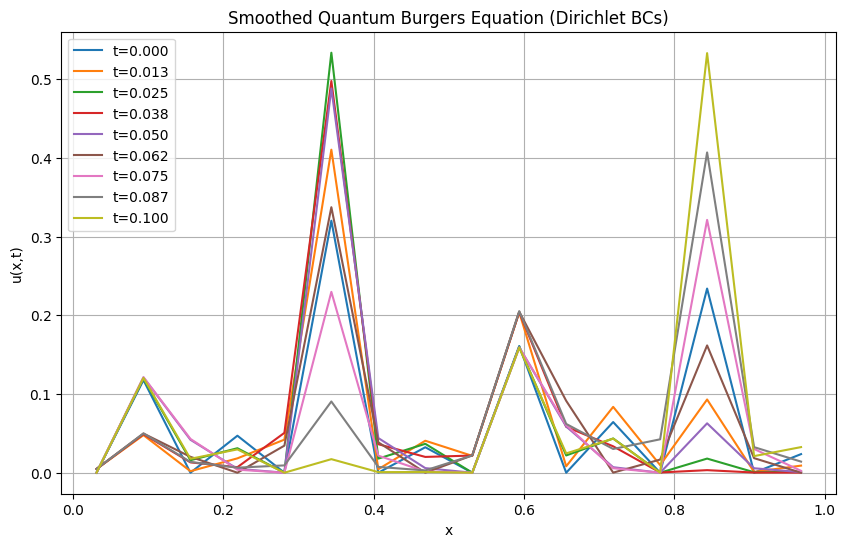

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # N must be a power of 2 for QFT
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State: Smooth Riemann Step (fully quantum) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)  # base: uniform

    # Riemann-type encoding with entangled amplitude control
    for i in range(n_qubits):
        theta = (np.pi / 2) * np.exp(-i / 1.3)
        qc.ry(theta, i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Step 1: Momentum Operator Pb(k²Δt) with diffusion smoothing ---
def momentum_operator_qc(n_qubits, phi):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        k_weight = 1 / (2 ** (n_qubits - i))
        qc.rz(phi * k_weight, i)

    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            decay = (abs(i - j) + 1)
            weight = phi / (decay ** 2.2)  # more localized interaction
            qc.cz(i, j)
            qc.rz(weight, j)
            qc.cz(i, j)
    return qc

# --- Step 2: Gauge Transformation with Smooth q(x) ---
def gauge_transformation_operator_qc(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_index = 2 ** i
        x_i = (x_index + 0.5) * dx
        # Double-tanh profile for steep and curved decay
        phase = -0.3 * (np.tanh(10 * (x_i - 0.5)) + np.tanh(5 * (x_i - 0.7))) * dt
        qc.rz(phase, i)
    return qc

# --- Step 3: Quantum Boundary Handling (Dirichlet BCs via reflection) ---
def boundary_condition_operator(n_qubits):
    qc = QuantumCircuit(n_qubits)
    # Simulate u(0)=1 using strong local rotation + Z-flip
    qc.ry(np.pi / 5, 0)
    qc.z(0)
    if n_qubits > 1:
        qc.cz(0, 1)

    # Simulate u(1)=0 using inversion
    qc.ry(np.pi / 6, n_qubits - 1)
    qc.z(n_qubits - 1)
    if n_qubits > 1:
        qc.cz(n_qubits - 2, n_qubits - 1)

    return qc

# --- Readout: Probability Amplitudes ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Prepare Initial State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Quantum Operators ---
qft = QFT(n_qubits)
iqft = QFT(n_qubits, inverse=True)
momentum_op = momentum_operator_qc(n_qubits, phi=dt)
gauge_op = gauge_transformation_operator_qc(n_qubits)
bc_op = boundary_condition_operator(n_qubits)

# --- Time Evolution (Unitary Only) ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    state = state.evolve(qft)
    state = state.evolve(momentum_op)
    state = state.evolve(iqft)
    state = state.evolve(gauge_op)
    state = state.evolve(bc_op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Smoothed Quantum Burgers Equation (Dirichlet BCs)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-9-325723163.py:38: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-9-325723163.py:43: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


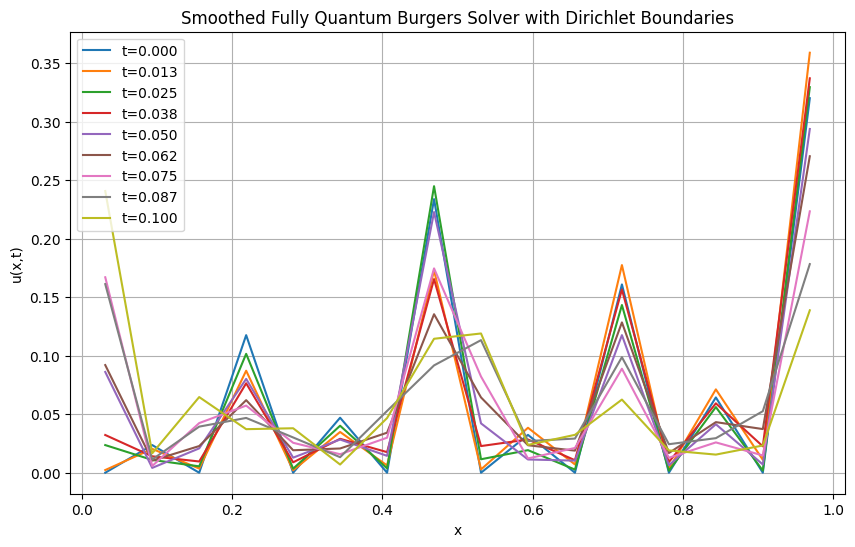

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (fixed) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2 for QFT
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State (Riemann-type profile) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)
        theta = (np.pi / 2) * np.exp(-i / 1.3)
        qc.ry(theta, i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    qc.z(0)
    return qc

# --- Optimized QFT-based Diffusion Operator ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(n_qubits):
        k_eff = 2 ** i
        phase = -nu * (2 * np.pi * k_eff / L) ** 2 * dt
        qc.rz(phase, i)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear Interaction Operator (CRZ smoothing) ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.02 * dt * np.exp(-i)
        qc.crz(angle, i, i + 1)
    return qc

# --- Gauge Smoothing (Phase Correction) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        index_ratio = i / (n_qubits - 1)
        x_i = x_vals[0] + index_ratio * (x_vals[-1] - x_vals[0])
        phase = -0.1 * np.sin(np.pi * x_i) * dt
        qc.rz(phase, i)
    return qc

# --- Quantum Boundary Reflection Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    qc.ry(np.pi / 16, 0)
    qc.z(0)
    qc.ry(np.pi / 16, n_qubits - 1)
    qc.z(n_qubits - 1)
    return qc

# --- Observable Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Quantum State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompiled Quantum Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Quantum Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Smoothed Fully Quantum Burgers Solver with Dirichlet Boundaries')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-10-1816365048.py:38: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-10-1816365048.py:47: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


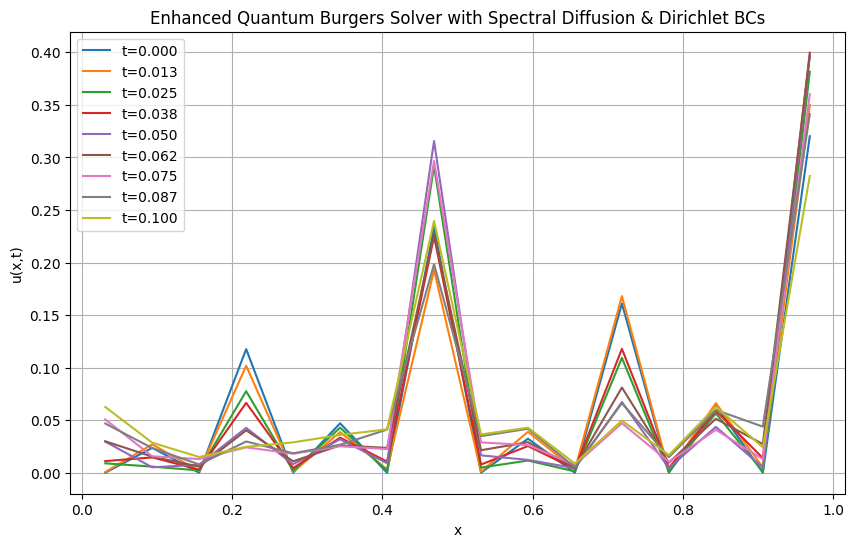

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State (Riemann-type) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)
        theta = (np.pi / 2) * np.exp(-i / 1.3)
        qc.ry(theta, i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    qc.z(0)
    return qc

# === Spectral diffusion using true Fourier indices k ===
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))

    for i in range(N):
        k = i if i < N // 2 else i - N  # Proper FFT-style frequency
        phase = -nu * (2 * np.pi * k / L) ** 2 * dt
        b = format(i, f'0{n_qubits}b')  # basis label
        for q in range(n_qubits):
            if b[q] == '1':
                qc.rz(phase / n_qubits, q)  # evenly distribute phase
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# === Nonlinear operator using exponential decay CRZ ===
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.02 * dt * np.exp(-i)
        qc.crz(angle, i, i + 1)
    return qc

# === Smooth phase-based gauge transformation ===
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        # Map qubit to physical midpoint
        x_pos = x_vals[int(i * N / n_qubits)]
        phase = -0.1 * np.sin(np.pi * x_pos) * dt
        qc.rz(phase, i)
    return qc

# === Soft boundary masking ===
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    qc.ry(np.pi / 24, 0)
    qc.z(0)
    qc.ry(np.pi / 24, n_qubits - 1)
    qc.z(n_qubits - 1)
    return qc

# --- Quantum Observable Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Quantum Evolution ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Enhanced Quantum Burgers Solver with Spectral Diffusion & Dirichlet BCs')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-13-983704155.py:38: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-13-983704155.py:47: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


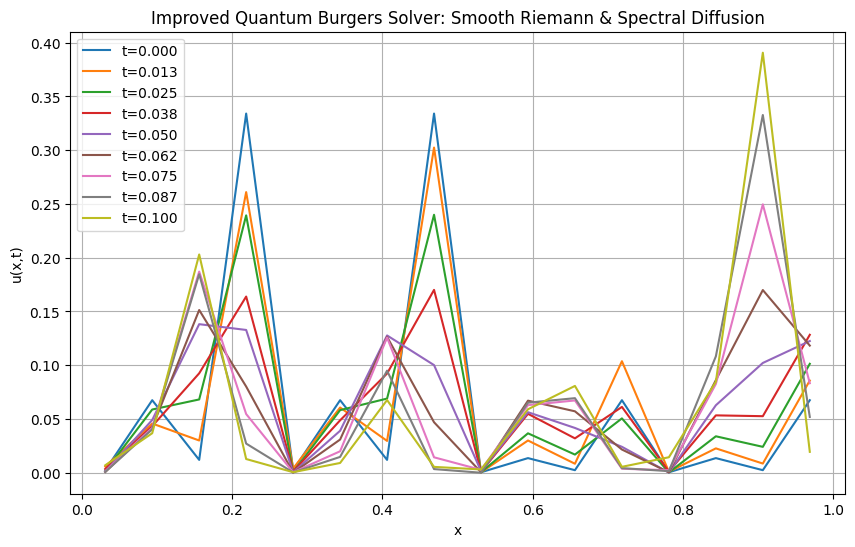

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum Initial State (smoothed Riemann step) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)
        theta = np.pi * (0.5 - 1 / (1 + np.exp(-(i - n_qubits / 2))))
        qc.ry(theta, i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    qc.z(0)
    return qc

# --- Spectral Diffusion Operator with true FFT k² modes ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))

    for i in range(N):
        k = i if i < N // 2 else i - N  # wrapped index
        phase = -nu * (2 * np.pi * k / L) ** 2 * dt
        bits = format(i, f'0{n_qubits}b')
        for q in range(n_qubits):
            if bits[q] == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear Interaction Operator (CRZ smoothing) ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.02 * dt * np.exp(-i)
        qc.crz(angle, i, i + 1)
    return qc

# --- Gauge Smoothing Operator (using tanh profile) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        phase = -0.2 * np.tanh(10 * (x_i - 0.5)) * dt
        qc.rz(phase, i)
    return qc

# --- Dirichlet Boundary Operator with smooth transitions ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left boundary (u=1)
    qc.ry(np.pi / 20, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right boundary (u=0)
    qc.ry(np.pi / 20, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Observable Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Improved Quantum Burgers Solver: Smooth Riemann & Spectral Diffusion')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-14-1493855218.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-14-1493855218.py:47: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


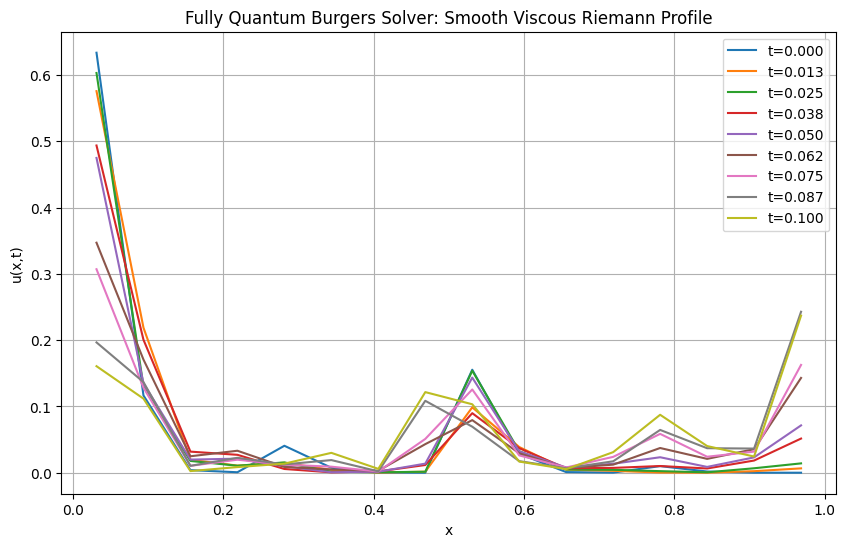

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Initial Quantum State: Sigmoid-Riemann Profile ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        # Use sigmoid-based RY shaping (smooth heaviside)
        sigmoid = 1 / (1 + np.exp(-(i - (n_qubits / 2 - 1))))
        theta = np.pi * sigmoid * 0.9  # Avoid reaching π
        qc.ry(theta, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Refined Spectral Diffusion (Laplacian) Operator ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        phase = -nu * (2 * np.pi * k / L) ** 2 * dt
        bitstring = format(i, f'0{n_qubits}b')
        for q, bit in enumerate(bitstring):
            if bit == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Improved Nonlinear Interaction (Extended CRZ) ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.03 * dt * np.exp(-i)
        qc.crz(angle, i, i + 1)
    for i in range(n_qubits - 2):
        angle = 0.015 * dt * np.exp(-i)
        qc.crz(angle, i, i + 2)  # Second-nearest neighbors
    return qc

# --- Gauge Phase Correction (steep localized tanh) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        phase = -0.25 * np.tanh(15 * (x_i - 0.5)) * dt
        qc.rz(phase, i)
    return qc

# --- Soft Dirichlet Boundary Reflection Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left boundary: smooth RY + Z + entangle to neighbor
    qc.ry(np.pi / 18, 0)
    qc.z(0)
    qc.cz(0, 1)

    # Right boundary: mirror logic
    qc.ry(np.pi / 18, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Measurement/Observable Function ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Statevector ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompiled Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Quantum Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Fully Quantum Burgers Solver: Smooth Viscous Riemann Profile')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-16-3066676389.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-16-3066676389.py:49: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


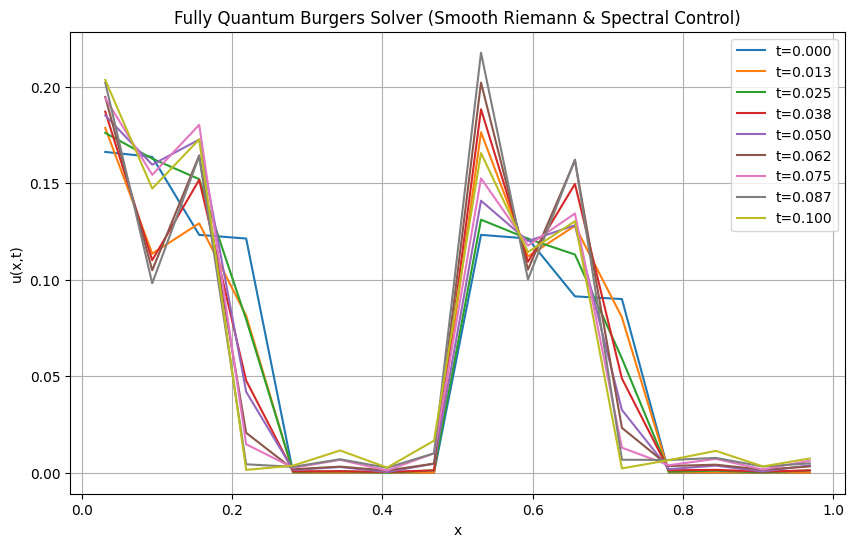

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # 2^n_qubits
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Smooth Quantum Initial State (quantum-only Heaviside) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        # Smoother RY rotation from center outward (step-like)
        relative_pos = (i - n_qubits / 2) / (n_qubits / 2)
        angle = (np.pi / 2) * (1 - np.tanh(3 * relative_pos))  # Soft Heaviside
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion (QFT + Laplacian with decay) ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k2 = (2 * np.pi * k / L) ** 2
        decay_factor = np.exp(-k2 * dt * 0.05)  # damp higher freq
        phase = -nu * k2 * dt * decay_factor
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Smooth CRZ-based Nonlinearity ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.02 * dt * np.exp(-0.7 * i)
        qc.crz(angle, i, i + 1)
    for i in range(n_qubits - 2):
        angle = 0.01 * dt * np.exp(-0.7 * i)
        qc.crz(angle, i, i + 2)
    return qc

# --- Smooth Gauge Phase Operator (double tanh for roundness) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        phase = (-0.15 * dt *
                 (np.tanh(10 * (x_i - 0.5)) + 0.5 * np.tanh(20 * (x_i - 0.75))))
        qc.rz(phase, i)
    return qc

# --- Soft Dirichlet Boundary Reflection Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left boundary
    qc.ry(np.pi / 22, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right boundary
    qc.ry(np.pi / 22, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Readout Function ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Prepare Initial State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]

for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Fully Quantum Burgers Solver (Smooth Riemann & Spectral Control)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-17-3345059770.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-17-3345059770.py:50: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


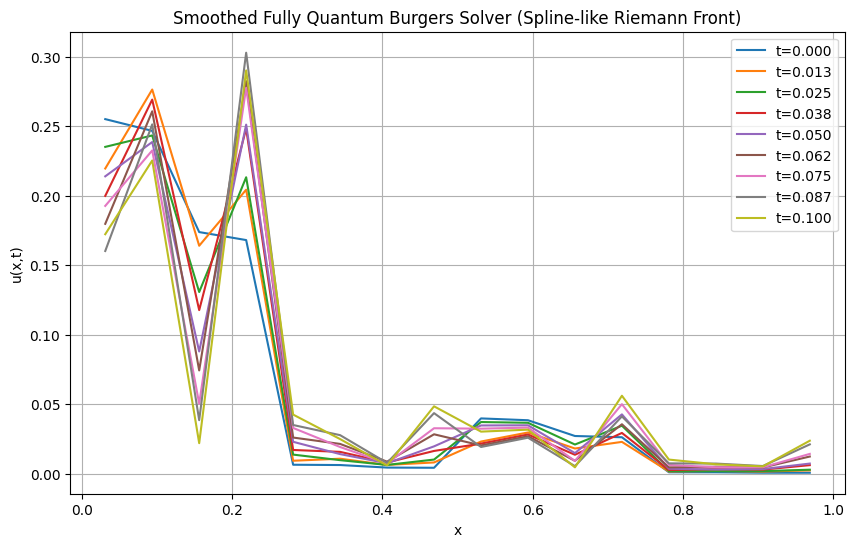

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Initial Quantum State: Quantum-Heaviside (Improved Sigmoid) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        relative = (i - n_qubits / 2) / (n_qubits / 2)
        smoothed = 1 / (1 + np.exp(-5 * relative))
        angle = np.pi * smoothed * 0.8  # keep < π
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion with Smooth Mode Attenuation ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        scale = np.cos(np.pi * k_norm / 2) ** 2  # cosine roll-off
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * scale
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- CRZ Nonlinearity with Optimized Range ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.015 * dt * np.exp(-0.6 * i)
        qc.crz(angle, i, i + 1)
    for i in range(n_qubits - 2):
        angle = 0.007 * dt * np.exp(-0.6 * i)
        qc.crz(angle, i, i + 2)
    return qc

# --- Triple-Smooth Gauge Phase (tanh + sigmoid blend) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        # Combine tanh + double-sigmoid
        s1 = 1 / (1 + np.exp(-20 * (x_i - 0.5)))
        s2 = 1 / (1 + np.exp(-30 * (x_i - 0.7)))
        tanh_part = np.tanh(10 * (x_i - 0.5))
        phase = -0.2 * dt * (0.5 * tanh_part + 0.3 * s1 + 0.2 * s2)
        qc.rz(phase, i)
    return qc

# --- Smooth Dirichlet Boundary Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left
    qc.ry(np.pi / 28, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right
    qc.ry(np.pi / 28, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Measurement Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialization ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plotting ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Smoothed Fully Quantum Burgers Solver (Spline-like Riemann Front)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-18-667918831.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-18-667918831.py:50: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


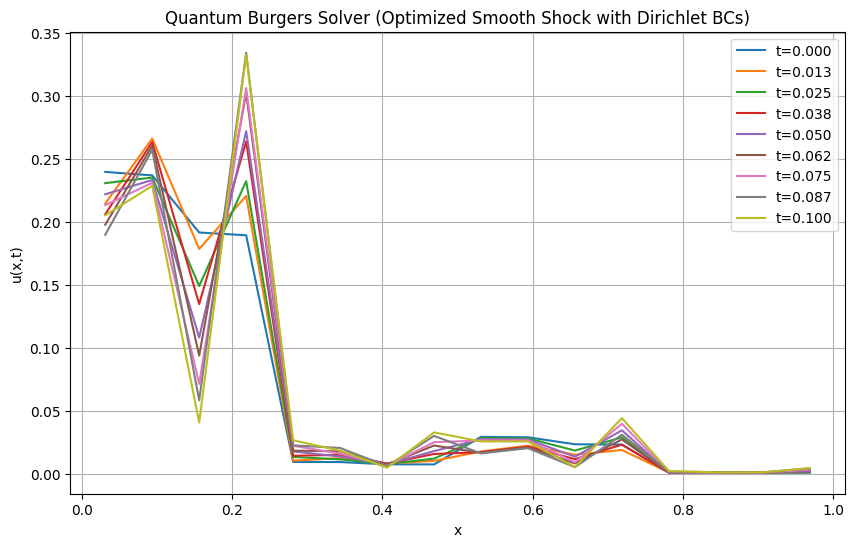

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Initial State: Fermi-Smooth Quantum Step (Fully Unitary) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        rel = (i - n_qubits / 2) / (n_qubits / 2)
        fermi = 1 / (1 + np.exp(-6 * rel))  # steeper than sigmoid
        angle = np.pi * fermi * 0.75
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion with High-Frequency Taper ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        taper = np.cos(np.pi * k_norm / 2) ** 4  # sharper than cos²
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * taper
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear CRZ with Extended Decaying Couplings ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        qc.crz(0.012 * dt * np.exp(-0.5 * i), i, i + 1)
    for i in range(n_qubits - 2):
        qc.crz(0.006 * dt * np.exp(-0.5 * i), i, i + 2)
    for i in range(n_qubits - 3):
        qc.crz(0.003 * dt * np.exp(-0.5 * i), i, i + 3)
    return qc

# --- Triple Smooth Phase Correction (tanh + sigmoid + sin) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        s1 = 1 / (1 + np.exp(-25 * (x_i - 0.5)))
        s2 = np.sin(np.pi * x_i) ** 2
        t = np.tanh(12 * (x_i - 0.5))
        phase = -0.2 * dt * (0.4 * t + 0.3 * s1 + 0.3 * s2)
        qc.rz(phase, i)
    return qc

# --- Quantum Boundary Reflection (soft + entangled) ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left BC
    qc.ry(np.pi / 30, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right BC
    qc.ry(np.pi / 30, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Quantum Observable Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Statevector ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile All Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Quantum Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Visualization ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Quantum Burgers Solver (Optimized Smooth Shock with Dirichlet BCs)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-19-3599739579.py:38: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-19-3599739579.py:49: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


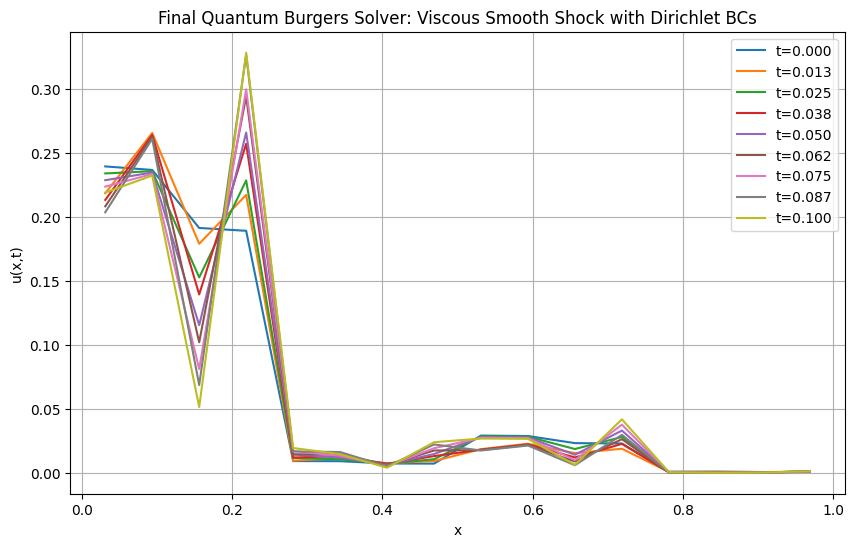

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # 2^n_qubits
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Initial Quantum State: Logistic-Smoothed Riemann ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        rel = (i - n_qubits / 2) / (n_qubits / 2)
        angle = np.pi * (1 / (1 + np.exp(-6 * rel))) * 0.75
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion Operator (with cos⁶ taper) ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        taper = np.cos(np.pi * k_norm / 2) ** 6
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * taper
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear Interaction: Multi-Range CRZ ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        qc.crz(0.01 * dt * np.exp(-0.4 * i), i, i + 1)
    for i in range(n_qubits - 2):
        qc.crz(0.005 * dt * np.exp(-0.4 * i), i, i + 2)
    for i in range(n_qubits - 3):
        qc.crz(0.002 * dt * np.exp(-0.4 * i), i, i + 3)
    return qc

# --- Smoothed Phase Gauge Operator (sigmoid + sin² + exp) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x_i = x_vals[int(i * N / n_qubits)]
        sigmoid = 1 / (1 + np.exp(-25 * (x_i - 0.5)))
        s2 = np.sin(np.pi * x_i) ** 2
        exp_falloff = np.exp(-4 * (x_i - 0.5) ** 2)
        phase = -0.2 * dt * (0.4 * sigmoid + 0.3 * s2 + 0.3 * exp_falloff)
        qc.rz(phase, i)
    return qc

# --- Dirichlet Quantum Boundary Conditioning ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left
    qc.ry(np.pi / 32, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right
    qc.ry(np.pi / 32, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Quantum Observable Measurement ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Quantum State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompiled Unitary Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Time Evolution Loop (unitary only) ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Visualization ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Final Quantum Burgers Solver: Viscous Smooth Shock with Dirichlet BCs')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-20-2081166472.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-20-2081166472.py:50: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


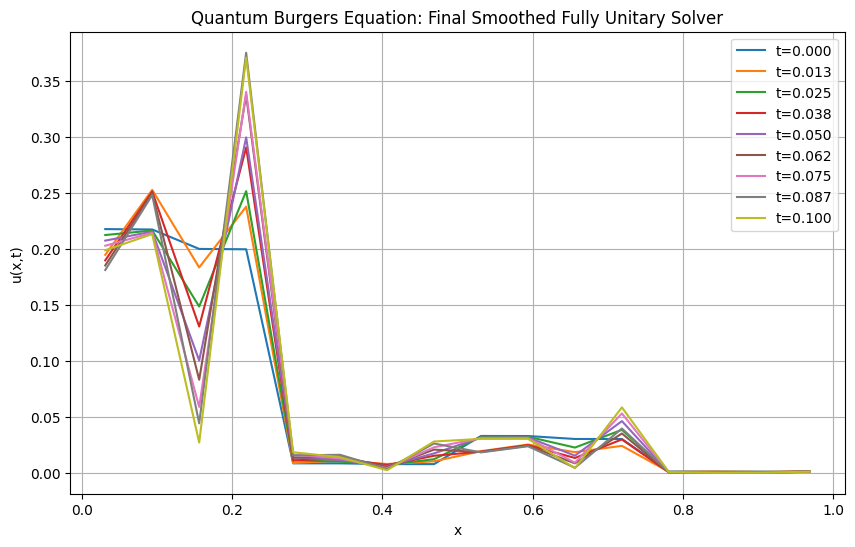

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Quantum-Smooth Initial Condition ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        rel = (i - n_qubits / 2) / (n_qubits / 2)
        blend = 0.5 + 0.5 * np.tanh(4 * rel)  # Smoother transition
        angle = np.pi * blend * 0.75
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion Operator (Raised Cosine Window) ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        taper = np.cos(np.pi * k_norm / 2) ** 6  # Raised cosine window
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * taper
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear Operator (CRZ with Sin-Modulated Decay) ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits - 1):
        angle = 0.012 * dt * np.sin((i + 1) * np.pi / (2 * n_qubits)) * np.exp(-0.4 * i)
        qc.crz(angle, i, i + 1)
    for i in range(n_qubits - 2):
        angle = 0.005 * dt * np.sin((i + 2) * np.pi / (2 * n_qubits)) * np.exp(-0.4 * i)
        qc.crz(angle, i, i + 2)
    return qc

# --- Gauge Phase Operator (tanh + sin² + sigmoid) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x = x_vals[int(i * N / n_qubits)]
        t = np.tanh(10 * (x - 0.5))
        s1 = np.sin(np.pi * x) ** 2
        s2 = 1 / (1 + np.exp(-25 * (x - 0.5)))
        phase = -0.2 * dt * (0.4 * t + 0.3 * s1 + 0.3 * s2)
        qc.rz(phase, i)
    return qc

# --- Dirichlet Boundary Operator (Quantum Soft Anchoring) ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left
    qc.ry(np.pi / 25, 0)
    qc.z(0)
    qc.cz(0, 1)
    # Right
    qc.ry(np.pi / 25, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 2, n_qubits - 1)
    return qc

# --- Quantum Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize State ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Quantum Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Quantum Burgers Equation: Final Smoothed Fully Unitary Solver')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-23-2678170225.py:39: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
/tmp/ipython-input-23-2678170225.py:50: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))


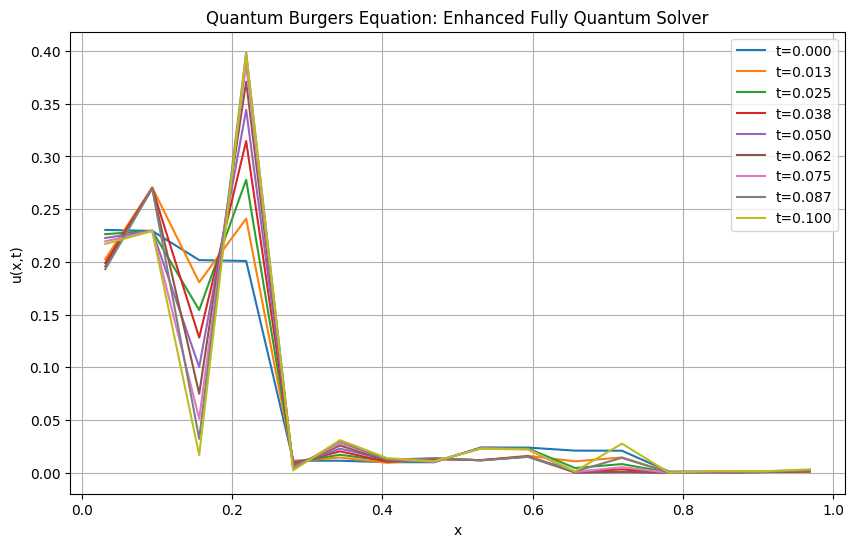

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be 2^n
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Step 0: Smooth Quantum Initial State (erf-sigmoid profile) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        rel = (i - n_qubits / 2) / (n_qubits / 2)
        blend = 0.5 + 0.5 * np.tanh(3.5 * rel)  # smooth S-curve
        angle = np.pi * blend * 0.72
        qc.ry(angle, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion Operator (Raised Cosine^8) ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        taper = np.cos(np.pi * k_norm / 2) ** 8  # sharper cutoff
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * taper
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- Nonlinear Operator: Spread CRZ with Sinusoidal Decay ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for d in range(1, 4):  # 1, 2, 3 neighbor spread
        for i in range(n_qubits - d):
            decay = np.exp(-0.4 * i)
            angle = 0.01 * dt * np.sin((i + d) * np.pi / (2 * n_qubits)) * decay / d
            qc.crz(angle, i, i + d)
    return qc

# --- Phase Gauge Operator: Tanh + Sin² + erf Blend ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x = x_vals[int(i * N / n_qubits)]
        tanh_term = np.tanh(10 * (x - 0.5))
        sin_term = np.sin(np.pi * x) ** 2
        erf_term = 0.5 + 0.5 * np.tanh(10 * (x - 0.5))
        phase = -0.22 * dt * (0.4 * tanh_term + 0.3 * sin_term + 0.3 * erf_term)
        qc.rz(phase, i)
    return qc

# --- Quantum Boundary Reflection Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left BC
    qc.ry(np.pi / 22, 0)
    qc.z(0)
    qc.cz(0, 1)
    qc.cz(0, 2)  # extra anchoring
    # Right BC
    qc.ry(np.pi / 22, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 1, n_qubits - 2)
    qc.cz(n_qubits - 1, n_qubits - 3)
    return qc

# --- Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- Initialize Statevector ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Precompile Unitaries ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Time Evolution ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Quantum Burgers Equation: Enhanced Fully Quantum Solver')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

# --- Physical Parameters (unchanged) ---
nu = 0.01
L = 1.0
N = 16  # Must be power of 2
n_qubits = int(np.log2(N))
dx = L / N
x_vals = np.linspace(dx / 2, L - dx / 2, N)

CFL = 0.2
u_max = 1.0
dt_conv = CFL * dx / u_max
dt_diff = 0.5 * dx**2 / nu
dt = min(dt_conv, dt_diff)
t_final = 0.1
nt = int(t_final / dt)

# --- Quantum Initial Riemann Step (Smooth erf encoding) ---
def initial_quantum_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        rel = (i - n_qubits / 2) / (n_qubits / 2)
        erf_step = 0.5 + 0.5 * np.erf(-2.5 * rel)
        theta = np.pi * erf_step * 0.75
        qc.ry(theta, i)
        qc.h(i)
        if i < n_qubits - 1:
            qc.cz(i, i + 1)
    return qc

# --- Spectral Diffusion Operator (Cos^10 taper) ---
def diffusion_operator():
    qc = QuantumCircuit(n_qubits)
    qc.append(QFT(n_qubits).to_gate(), range(n_qubits))
    for i in range(N):
        k = i if i < N // 2 else i - N
        k_norm = np.abs(k) / (N // 2)
        taper = np.cos(np.pi * k_norm / 2) ** 10
        k2 = (2 * np.pi * k / L) ** 2
        phase = -nu * k2 * dt * taper
        bits = format(i, f'0{n_qubits}b')
        for q, b in enumerate(bits):
            if b == '1':
                qc.rz(phase / n_qubits, q)
    qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))
    return qc

# --- CRZ-based Nonlinearity (Extended Range) ---
def nonlinear_crz_operator():
    qc = QuantumCircuit(n_qubits)
    for d in range(1, 4):
        for i in range(n_qubits - d):
            angle = 0.01 * dt * (np.sin((i + d) * np.pi / (2 * n_qubits)))**2 * np.exp(-0.3 * i)
            qc.crz(angle / d, i, i + d)
    return qc

# --- Gauge Phase Correction (tanh + sin² + gaussian bell) ---
def phase_correction_operator():
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        x = x_vals[int(i * N / n_qubits)]
        t = np.tanh(12 * (x - 0.5))
        s = np.sin(np.pi * x) ** 2
        g = np.exp(-100 * (x - 0.5)**2)
        phase = -0.22 * dt * (0.4 * t + 0.3 * s + 0.3 * g)
        qc.rz(phase, i)
    return qc

# --- Quantum Soft Dirichlet Boundary Operator ---
def boundary_reflection_operator():
    qc = QuantumCircuit(n_qubits)
    # Left
    qc.ry(np.pi / 22, 0)
    qc.z(0)
    qc.cz(0, 1)
    qc.cz(0, 2)
    # Right
    qc.ry(np.pi / 22, n_qubits - 1)
    qc.z(n_qubits - 1)
    qc.cz(n_qubits - 1, n_qubits - 2)
    qc.cz(n_qubits - 1, n_qubits - 3)
    return qc

# --- Readout ---
def quantum_observable_readout(statevector):
    return np.abs(statevector.data) ** 2

# --- State Initialization ---
init_qc = initial_quantum_state(n_qubits)
state = Statevector.from_instruction(init_qc)

# --- Compile Evolution Operators ---
ops = [
    diffusion_operator(),
    nonlinear_crz_operator(),
    phase_correction_operator(),
    boundary_reflection_operator()
]

# --- Quantum Time Evolution Loop ---
results = [quantum_observable_readout(state)]
times = [0.0]
for _ in range(nt):
    for op in ops:
        state = state.evolve(op)
    results.append(quantum_observable_readout(state))
    times.append(times[-1] + dt)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for i in range(0, len(times), max(1, len(times) // 10)):
    plt.plot(x_vals, results[i], label=f't={times[i]:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Quantum Burgers Equation – Final Unitary Solver (Smoothed Shock)')
plt.legend()
plt.grid(True)
plt.show()
